# Exploratry Data Analysis and Model development on Census Data

# Libraries 

In [ ]:
#Libraries
from matplotlib import rcParams
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from matplotlib.cm import rainbow

# Reading Data

In [ ]:
# Read Test and Train data and replace ? with NA

df_test = pd.read_csv('Test_data.csv', na_values= ' ?')
df_train = pd.read_csv('Train_data.csv', na_values= ' ?')

# Data cleaning and preprocessing 

In [ ]:
# Adding column names to train data
df_train.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

# Adding column names to test data
df_test.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22744 entries, 0 to 22743
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22744 non-null  int64 
 1   workclass       21472 non-null  object
 2   fnlwgt          22744 non-null  int64 
 3   education       22744 non-null  object
 4   education-num   22744 non-null  int64 
 5   marital-status  22744 non-null  object
 6   occupation      21468 non-null  object
 7   relationship    22744 non-null  object
 8   race            22744 non-null  object
 9   sex             22744 non-null  object
 10  capital-gain    22744 non-null  int64 
 11  capital-loss    22744 non-null  int64 
 12  hours-per-week  22744 non-null  int64 
 13  native-country  22338 non-null  object
 14  income          22744 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [ ]:
df_train.shape

(22744, 15)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9815 non-null   int64 
 1   workclass       9251 non-null   object
 2   fnlwgt          9815 non-null   int64 
 3   education       9815 non-null   object
 4   education-num   9815 non-null   int64 
 5   marital-status  9815 non-null   object
 6   occupation      9248 non-null   object
 7   relationship    9815 non-null   object
 8   race            9815 non-null   object
 9   sex             9815 non-null   object
 10  capital-gain    9815 non-null   int64 
 11  capital-loss    9815 non-null   int64 
 12  hours-per-week  9815 non-null   int64 
 13  native-country  9638 non-null   object
 14  income          9815 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [ ]:
df_test.shape

(9815, 15)

### Handling Null and Missing Values

In [ ]:
# Removing any space in the names of the columns
df_train.columns = df_train.columns.str.replace(' ', '')
df_train.columns

df_test.columns = df_test.columns.str.replace(' ', '')
df_test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
#Finding what percentage of data is missing from the Train dataset

total_train = df_train.isnull().sum().sort_values(ascending=False)
percent_1_train = df_train.isnull().sum()/df_train.isnull().count()*100
percent_2_train = (round(percent_1_train, 1)).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_2_train], axis=1, keys=['Total', '%'])

#Finding what percentage of data is missing from the Test dataset

total_test = df_test.isnull().sum().sort_values(ascending=False)
percent_1_test = df_test.isnull().sum()/df_test.isnull().count()*100
percent_2_test = (round(percent_1_test, 1)).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_2_test], axis=1, keys=['Total', '%'])

print(missing_data_train.head(5),missing_data_test.head(5))

                Total    %
occupation       1276  5.6
workclass        1272  5.6
native-country    406  1.8
income              0  0.0
hours-per-week      0  0.0                 Total    %
occupation        567  5.8
workclass         564  5.7
native-country    177  1.8
income              0  0.0
hours-per-week      0  0.0


In [ ]:
# Here we got to know that workclass, occupation, native-country contains missing values. 
df_train.info()
print("---------------------------------------")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22744 entries, 0 to 22743
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22744 non-null  int64 
 1   workclass       21472 non-null  object
 2   fnlwgt          22744 non-null  int64 
 3   education       22744 non-null  object
 4   education-num   22744 non-null  int64 
 5   marital-status  22744 non-null  object
 6   occupation      21468 non-null  object
 7   relationship    22744 non-null  object
 8   race            22744 non-null  object
 9   sex             22744 non-null  object
 10  capital-gain    22744 non-null  int64 
 11  capital-loss    22744 non-null  int64 
 12  hours-per-week  22744 non-null  int64 
 13  native-country  22338 non-null  object
 14  income          22744 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB
---------------------------------------/n
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2

In [ ]:
# All the three columns which contains missing values are categorical, so we will use mode to replaces these missing values. 

for col in ['workclass', 'occupation', 'native-country']:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)

for col in ['workclass', 'occupation', 'native-country']:
    df_test[col].fillna(df_test[col].mode()[0], inplace=True)

In [ ]:
#calculate sum of null for train data
df_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
#calculate sum of null for test data
df_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
# Replace Income column of Train data to 0,1
df_train_final = df_train.replace({' <=50K':0,' >50K':1})

df_test_final = df_test.replace({' <=50K':0,' >50K':1})

In [ ]:
df_train_final
df_test_final

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Private,491000,Bachelors,13,Never-married,Exec-managerial,Other-relative,Black,Male,0,0,45,United-States,0
1,33,Private,399088,HS-grad,9,Divorced,Transport-moving,Unmarried,White,Female,0,0,40,United-States,0
2,41,Self-emp-not-inc,186909,Masters,14,Married-civ-spouse,Sales,Wife,White,Female,0,1902,35,United-States,1
3,65,Private,105491,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,1
4,40,Private,34987,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,53,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9810,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
9811,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
9812,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
9813,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


# Exploratory Analysis & Visualization 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc628024890>,
      dtype=object)

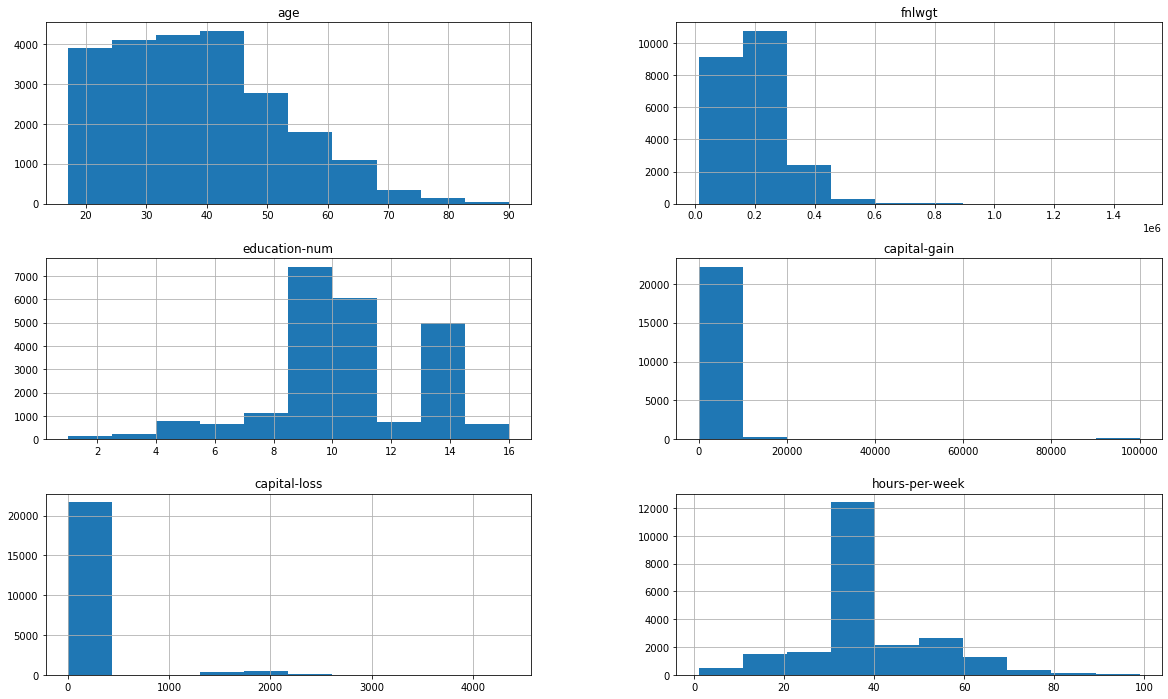

In [ ]:
rcParams['figure.figsize'] = 20, 12
df_train_final[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].hist()

From the histograms above, we can infer the following:

- We can group the Age column into bins.
- For Capital Gain and Capital Loss the data is highly left skewed which needs to be tackled.
- We need to analyse Education Number further as it might align with Education information.
- Final Weight is also left skewed.
- The Hours per Week can also be split into bins.

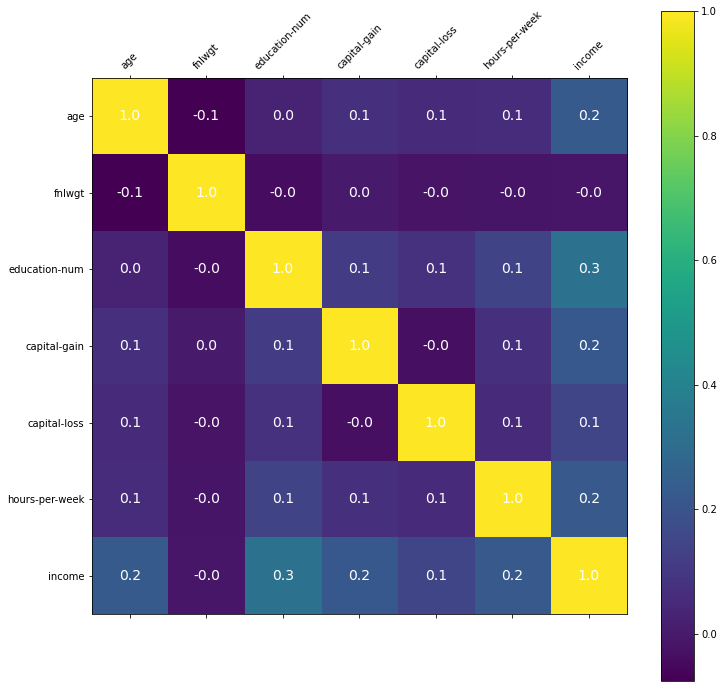

In [ ]:
plt.matshow(df_train_final.corr())
plt.colorbar()
plt.xticks(np.arange(len(df_train_final.corr().columns)), df_train_final.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df_train_final.corr().columns)), df_train_final.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df_train_final.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

As can be seen from the above correlation matrix, there isn't a strong linear relationship between any of the continuous features and the target variable. Also, because Final Weight has no relationship with the output class, we'll remove it later.

### Age

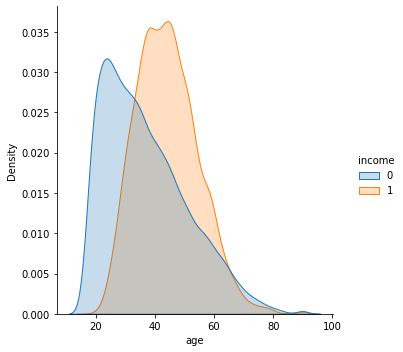

In [ ]:
# median age of >50K group is higher and distribution for <=50K is not normally distributed (right-skewed)
sns.displot(df_train_final, x="age", hue="income", kind="kde", fill = True, common_norm=False) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The maximum age is 90
The minimum age is 17


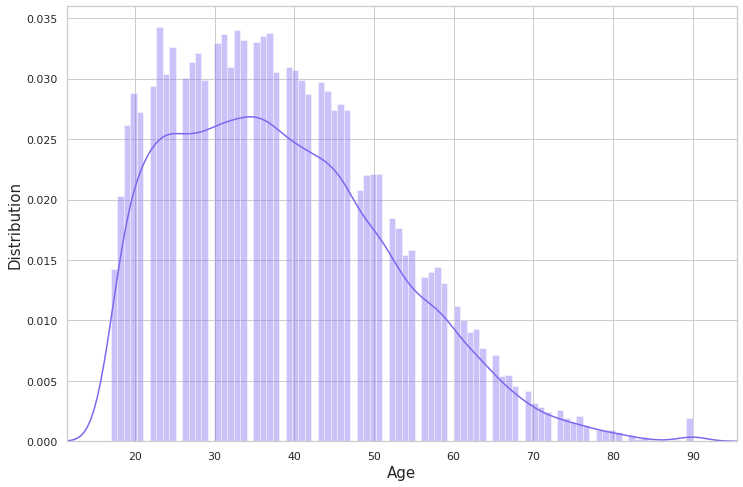

In [ ]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df_train_final['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df_train_final['age'].max())
print ("The minimum age is", df_train_final['age'].min())

Here, We'll bucket the age into separate bins.

1. 0-25: Young
2. 25-50: Adult
3. 50-100: Old

In [ ]:
df_train_final['age'] = pd.cut(df_train_final['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])
df_test_final['age'] = pd.cut(df_test_final['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

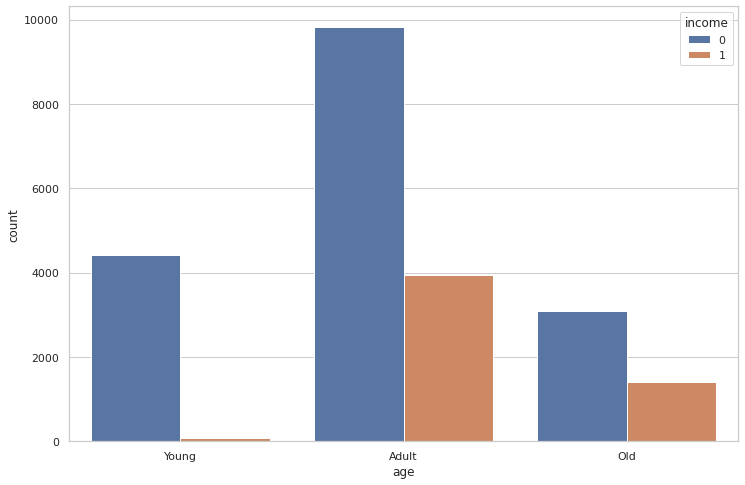

In [ ]:
sns.countplot(x = 'age', hue = 'income', data = df_train_final)

It appears that there are relatively less Young people who have an income more than $50K.

### Capital Gain and Capital Loss 

Rather than having both Capital Gain and Capital Loss, we will use their difference as that is more relevant and gives the change.

In [ ]:
#For Train Data
df_train_final['capital-diff'] = df_train_final['capital-gain'] - df_train_final['capital-loss']
df_train_final.drop(['capital-gain'], axis = 1, inplace = True)
df_train_final.drop(['capital-loss'], axis = 1, inplace = True)

#For Test Data
df_test_final['capital-diff'] = df_test_final['capital-gain'] - df_test_final['capital-loss']
df_test_final.drop(['capital-gain'], axis = 1, inplace = True)
df_test_final.drop(['capital-loss'], axis = 1, inplace = True)

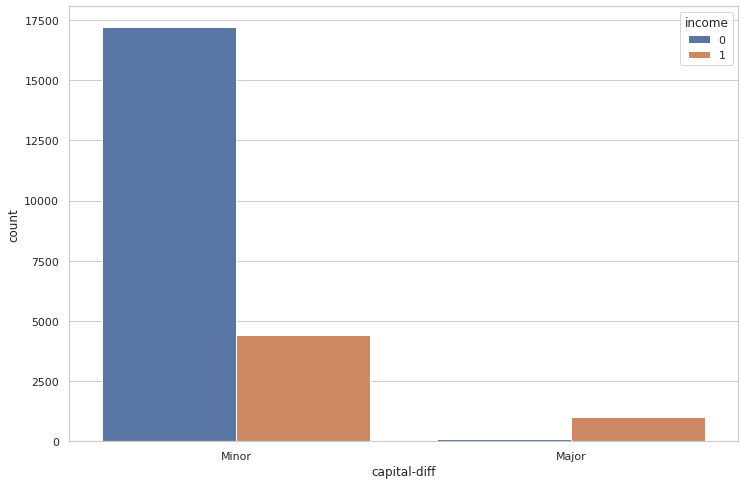

In [ ]:
#Train Data
df_train_final['capital-diff'] = pd.cut(df_train_final['capital-diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'capital-diff', hue = 'income', data = df_train_final)

#Test Data
df_test_final['capital-diff'] = pd.cut(df_test_final['capital-diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])


On taking a look at the result, we can see that the for Minor there are more people with Income less than $$50k and for Major there are more people with Income greater than $50k . This is in complete agreement with the fact that people who have large Capital Gain compared to Capital Loss have Income more than $50k .

### Final Weight

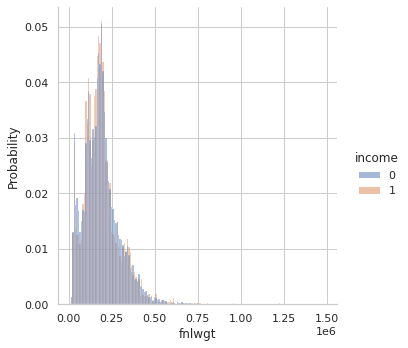

In [ ]:
#compare distributions of 'fnlwgt' with respect to two guages of income: <=50K and >50K 
sns.displot(df_train_final, x="fnlwgt", hue="income", stat="probability", common_norm=False) #there is no significant difference

As seen above, there is no correlation between Income and Final Weight, so we will drop this column.

In [ ]:
#Train Data
df_train_final.drop(['fnlwgt'], axis = 1, inplace = True)

#Test Data
df_test_final.drop(['fnlwgt'], axis = 1, inplace = True)

### Hours per Week

Taking a look at the histogram for Hours per Week, we can see that the dataset is aligned around the center. we can still create buckets from this data. As usually, the work hours are close to 30-40 hours, we will create the buckets as 0-30, 30-40, and 40-100.

In [ ]:
#Train Data
df_train_final['hours-per-week'] = pd.cut(df_train_final['hours-per-week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])
#Test Data
df_test_final['hours-per-week'] = pd.cut(df_test_final['hours-per-week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

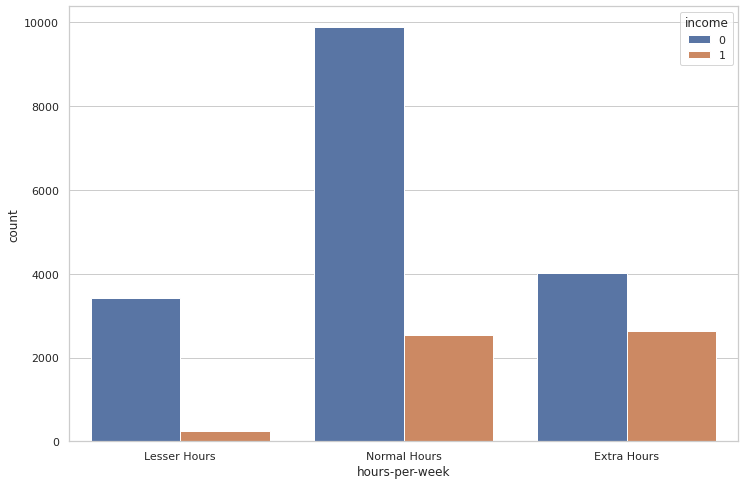

In [ ]:
sns.countplot(x = 'hours-per-week', hue = 'income', data = df_train_final)

Taking a look at the plot above, we can see a trend. As the number of hours increase, the number of people earning more than $50K increases in comparison to the people earning less.

### Work Class

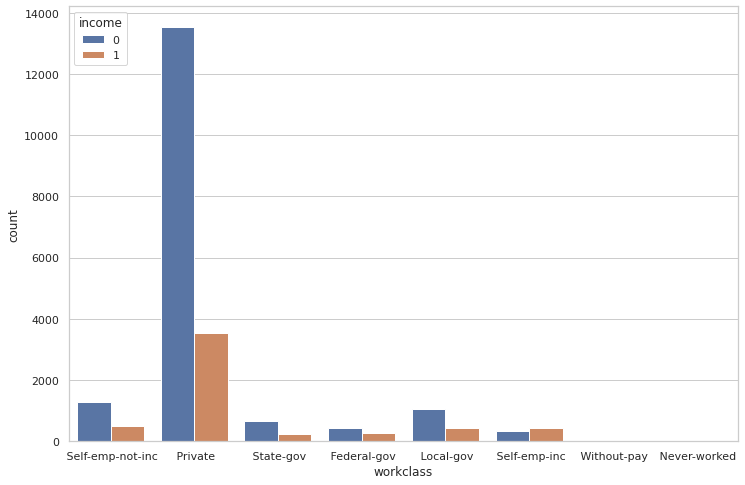

In [ ]:
sns.countplot(x = 'workclass', hue = 'income', data = df_train_final)

The two values Without-pay and Never-worked are negligible and hence it is safe to drop them.

In [ ]:

df_train_final = df_train_final.drop(df_train_final[df_train_final['workclass'] == ' Without-pay'].index)
df_train_final = df_train_final.drop(df_train_final[df_train_final['workclass'] == ' Never-worked'].index)


df_test_final = df_test_final.drop(df_test_final[df_test_final['workclass'] == ' Without-pay'].index)
df_test_final = df_test_final.drop(df_test_final[df_test_final['workclass'] == ' Never-worked'].index)

### Education and Education Number

Now we will check the relation between Education and Education Number 

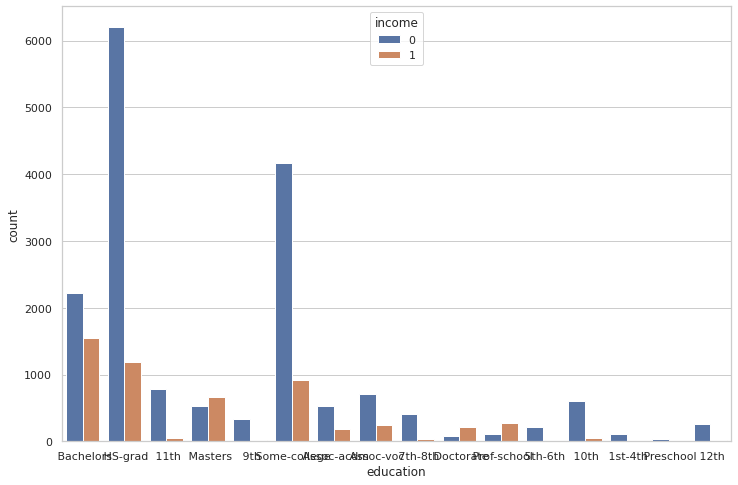

In [ ]:
sns.countplot(x = 'education', hue = 'income', data = df_train_final)

In [ ]:
education_sets = df_train_final['education'].unique()
for edu_class in education_sets:
    print("For {}, the Education Number is {}"
          .format(edu_class, df_train_final[df_train_final['education'] == edu_class]['education-num'].unique()))

For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  9th, the Education Number is [5]
For  Some-college, the Education Number is [10]
For  Assoc-acdm, the Education Number is [12]
For  Assoc-voc, the Education Number is [11]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  1st-4th, the Education Number is [2]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]


From the analysis above, we discovered that Education Number and Education are just the same. So, we can drop any one column. 

In [ ]:
df_train_final.drop(['education'], axis = 1, inplace = True)
df_test_final.drop(['education'], axis = 1, inplace = True)

### Marital Status and Relationship

In [ ]:
df_train_final['marital-status'].value_counts()

 Married-civ-spouse       10414
 Never-married             7468
 Divorced                  3130
 Separated                  707
 Widowed                    693
 Married-spouse-absent      305
 Married-AF-spouse           15
Name: marital-status, dtype: int64

In [ ]:
df_train_final['relationship'].value_counts()

 Husband           9148
 Not-in-family     5888
 Own-child         3524
 Unmarried         2379
 Wife              1117
 Other-relative     676
Name: relationship, dtype: int64

There is some overlap between the two, for example, if a person is married to his or her spouse, their marital status is Married. We'll preserve both of these columns, though, because there's no complete overlap.

### Occupation

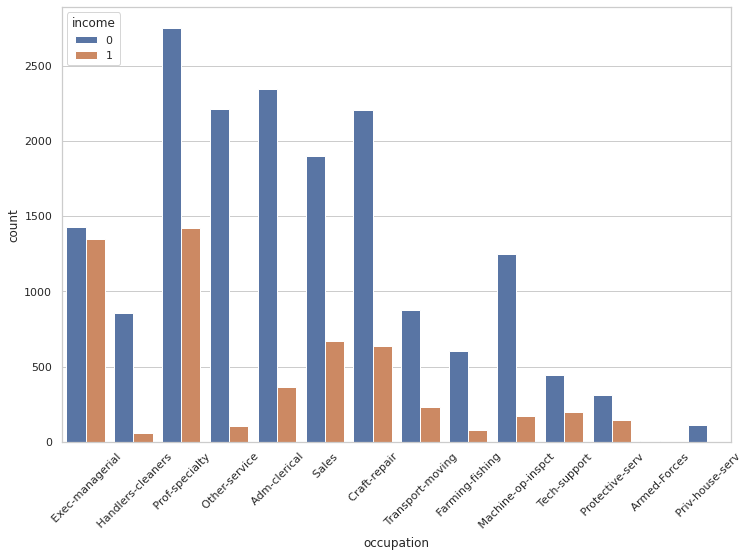

In [ ]:
plt.xticks(rotation = 45)
sns.countplot(x = 'occupation', hue = 'income', data = df_train_final)

The categories have already been uniquely defined and we can keep it as is.

### Race

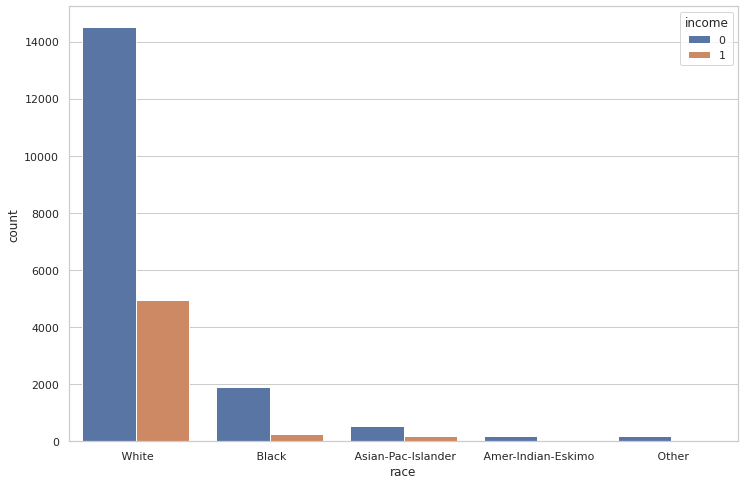

In [ ]:
sns.countplot(x = 'race', hue = 'income', data = df_train_final)

The dataset contains the majority of data on the White race, with information on the other races being sparse. I'll group all other race data into a single category called Other.

### Sex

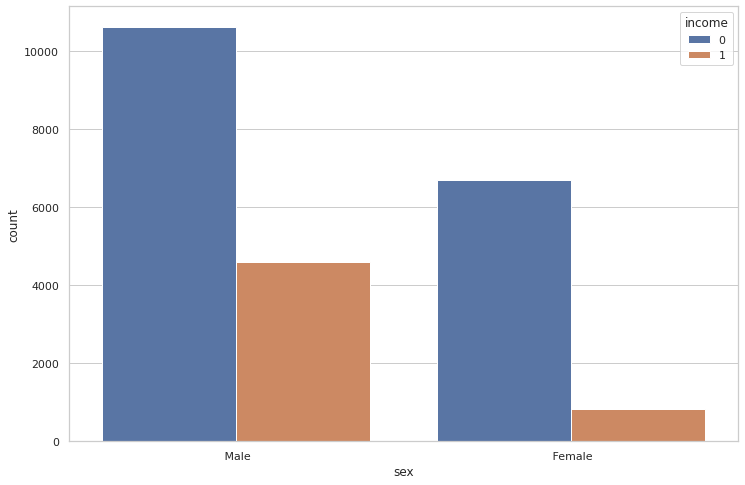

In [ ]:
sns.countplot(x = 'sex', hue = 'income', data = df_train_final)

It is evident from the diagram above that:

- There are more men than women among the participants.When we compare the two genders and their respective income distributions, we find that males have a higher percentage of income over $50,000 than females.

### Country

In [ ]:
country_sum = df_train_final['native-country'].value_counts()
country_sum

 United-States                 20770
 Mexico                          440
 Philippines                     139
 Germany                          94
 Canada                           92
 Puerto-Rico                      88
 England                          69
 Cuba                             68
 El-Salvador                      65
 South                            59
 India                            59
 Jamaica                          55
 China                            54
 Italy                            50
 Guatemala                        49
 Dominican-Republic               49
 Poland                           47
 Vietnam                          47
 Japan                            45
 Columbia                         39
 Taiwan                           37
 Haiti                            36
 Iran                             34
 Portugal                         27
 Greece                           22
 Nicaragua                        22
 Ireland                          19
 

Text(0.5, 1.0, 'Total adults from each Country')

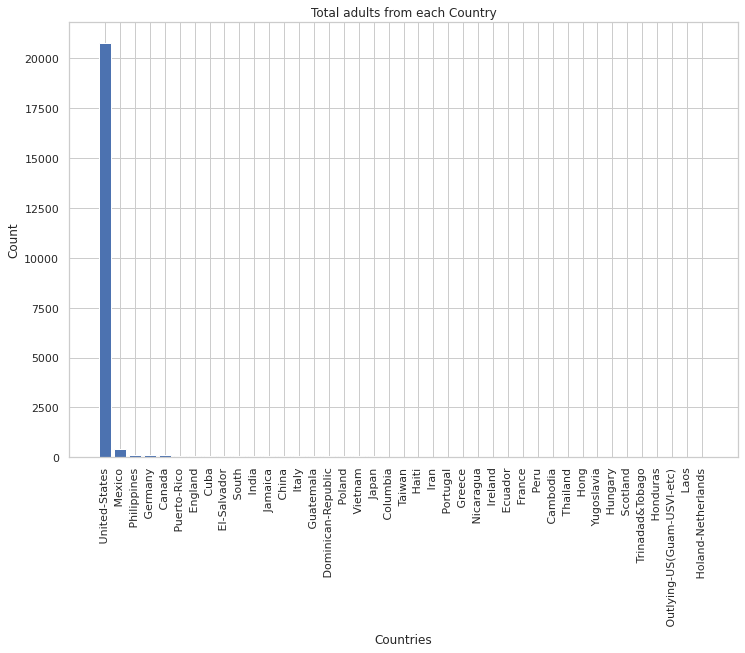

In [ ]:
plt.bar(country_sum.index, country_sum.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')

The adults are mostly from the United States. As a result, we can assign values to the column as either United States or Other.

In [ ]:
countries_train = np.array(df_train_final['native-country'].unique())
countries_train = np.delete(countries_train, 0)

countries_test = np.array(df_test_final['native-country'].unique())
countries_test = np.delete(countries_test, 0)

In [ ]:
df_train_final['native-country'].replace(countries_train, 'Other', inplace = True)

df_test_final['native-country'].replace(countries_test, 'Other', inplace = True)

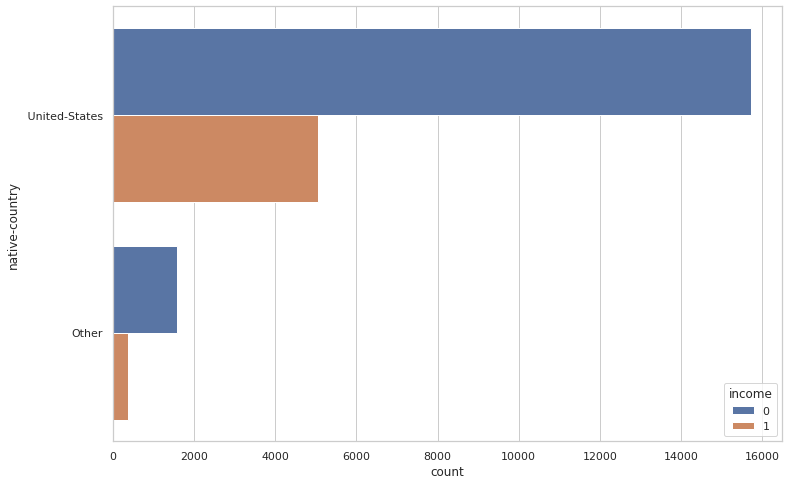

In [ ]:
sns.countplot(y = 'native-country', hue = 'income', data = df_train_final)

# Model Selection 

In [ ]:
# Re-arranging the columns
df_train_final = df_train_final[["age", "workclass",    "education-num",    "marital-status",    "occupation",    "relationship",    "race",    "sex",    "hours-per-week",    "native-country", "capital-diff","income"]]
df_test_final = df_test_final[["age", "workclass",    "education-num",    "marital-status",    "occupation",    "relationship",    "race",    "sex",    "hours-per-week",    "native-country", "capital-diff","income"]]

In [ ]:
# Splitting the data
X_train = df_train_final.drop(['income'], axis=1)
y_train = df_train_final['income']

X_test = df_test_final.drop(['income'], axis=1)
y_test = df_test_final['income']

In [ ]:
categorical = ['age','workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex','hours-per-week', 'native-country','capital-diff']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [ ]:
categorical_final = ['age','workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex','hours-per-week', 'native-country','capital-diff']
for feature in categorical_final:
        le = preprocessing.LabelEncoder()
        df_train_final[feature] = le.fit_transform(df_train_final[feature])

In [ ]:
X_train

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,capital-diff
0,0,4,13,2,3,0,4,1,1,0,1
1,0,2,9,0,5,1,4,1,2,0,1
2,1,2,7,2,5,0,2,1,2,0,1
3,0,2,13,2,9,5,2,0,2,1,1
4,0,2,14,2,3,5,4,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
22739,2,2,9,4,11,3,2,1,2,0,1
22740,2,2,10,4,0,3,4,0,2,0,1
22741,0,2,9,4,0,3,4,1,2,0,1
22742,0,2,9,2,10,0,4,1,2,0,1


In [ ]:
y_test

0       0
1       0
2       1
3       1
4       0
       ..
9810    0
9811    1
9812    0
9813    0
9814    1
Name: income, Length: 9806, dtype: int64

## GridSearch Method

In [ ]:
df_train_final

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,capital-diff,income
0,0,4,13,2,3,0,4,1,1,0,1,0
1,0,2,9,0,5,1,4,1,2,0,1,0
2,1,2,7,2,5,0,2,1,2,0,1,0
3,0,2,13,2,9,5,2,0,2,1,1,0
4,0,2,14,2,3,5,4,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22739,2,2,9,4,11,3,2,1,2,0,1,0
22740,2,2,10,4,0,3,4,0,2,0,1,0
22741,0,2,9,4,0,3,4,1,2,0,1,0
22742,0,2,9,2,10,0,4,1,2,0,1,0


In [ ]:
#Grid Search for KNN

p={'n_neighbors':np.arange(1,50), 'metric': ['euclidean', 'manhattan'], 'weights': ['uniform', 'distance']}
knn=KNeighborsClassifier()
x_knn=GridSearchCV(knn, p, cv=5, scoring='accuracy')

x_knn.fit(df_train_final.iloc[:, :-1], df_train_final.iloc[:, -1])

results_knn = pd.DataFrame(x_knn.cv_results_)
results_knn[results_knn['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
138,0.055947,0.000813,0.559716,0.003515,manhattan,21,uniform,"{'metric': 'manhattan', 'n_neighbors': 21, 'we...",0.833737,0.838575,0.83414,0.843819,0.83524,0.837102,0.003764,1


In [ ]:
#Grid Search for Decision Trees
from sklearn.tree import DecisionTreeClassifier

p = {'max_depth':np.arange(1,31), 'criterion': ['entropy', 'gini'], 'splitter': ['best', 'random']}


des=DecisionTreeClassifier()

x_des=GridSearchCV(des, p, cv=5, scoring='accuracy')

x_des.fit(df_train_final.iloc[:, :-1], df_train_final.iloc[:, -1])

results_des = pd.DataFrame(x_des.cv_results_)
results_des[results_des['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
68,0.016988,0.000239,0.001882,0.000045,gini,5,best,"{'criterion': 'gini', 'max_depth': 5, 'splitte...",0.839675,0.844733,0.838319,0.846458,0.842719,0.842381,0.003036,1


### Different Classication Models Performance (Without Scaling)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

scores=pd.DataFrame(columns=['Model','Training Accuracy Score', 'Test Accuracy Score'])

pipe_log=Pipeline(steps=[('Logistic', LogisticRegression())])
pipe_knn=Pipeline(steps=[('KNN', KNeighborsClassifier(21, 'uniform', metric='manhattan'))])
pipe_nb=Pipeline(steps=[('NB', MultinomialNB())])
pipe_dt=Pipeline(steps=[('Decision Tree', DecisionTreeClassifier('gini', 'best', 5))])

pipe=[pipe_log, pipe_knn, pipe_nb, pipe_dt]
mo=['Logistic Regression', 'KNN Classifier', 'Naive Bayes', 'Decision Tree Classifier']
j=0

for i in pipe:
  x_pip=i.fit(X_train, y_train)
  tra=accuracy_score(x_pip.predict(X_train), y_train)
  tea=accuracy_score(x_pip.predict(X_test), y_test)
  scores.loc[j]=[mo[j],tra, tea]
  j+=1

scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Model,Training Accuracy Score,Test Accuracy Score
0,Logistic Regression,0.827160,0.827351
1,KNN Classifier,0.848408,0.833877
2,Naive Bayes,0.779430,0.785030
3,Decision Tree Classifier,0.843788,0.843871


### Different Classication Models Performance (After Scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scores=pd.DataFrame(columns=['Model','Training Accuracy Score', 'Test Accuracy Score'])

pipe_log_scaled= Pipeline(steps=[('Scaler', StandardScaler()), ('Logistic', LogisticRegression(C=1, l1_ratio=0.001, solver='lbfgs', penalty='l2'))])
pipe_knn_scaled=Pipeline(steps=[('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier(21, 'uniform', metric='manhattan'))])
pipe_nb_scaled=Pipeline(steps=[('Scaler', MinMaxScaler()),('NB', MultinomialNB())])
pipe_dt_scaled=Pipeline(steps=[('Scaler', StandardScaler()), ('Decision Tree', DecisionTreeClassifier('gini', 'best', 5))])

pipe=[pipe_log_scaled, pipe_knn_scaled, pipe_nb_scaled, pipe_dt_scaled]
mo=['Logistic Regression', 'KNN Classifier', 'Naive Bayes', 'Decision Tree Classifier']
j=0


for i in pipe:
  x=i.fit(X_train, y_train)
  tra=accuracy_score(x.predict(X_train), y_train)
  tea=accuracy_score(x.predict(X_test), y_test)

  scores.loc[j]=[mo[j],tra, tea]
  j+=1


scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


,Model,Training Accuracy Score,Test Accuracy Score
0,Logistic Regression,0.827248,0.827453
1,KNN Classifier,0.853774,0.847338
2,Naive Bayes,0.761174,0.754028
3,Decision Tree Classifier,0.843788,0.843871


## Neural Network

In [ ]:
model_NN = MLPClassifier(max_iter=800, learning_rate_init= 0.003, activation='relu')
model_NN.fit(X_train, y_train)
pred = model_NN.predict(X_test)
accuracy_score(y_test, pred)

0.8482561696920253

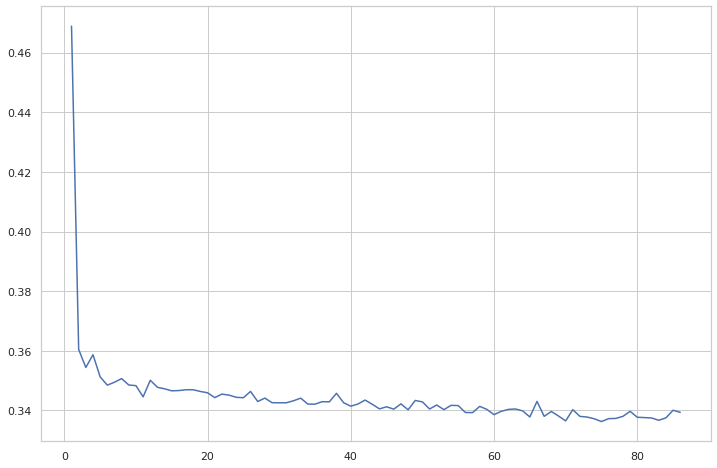

In [ ]:
sns.lineplot(y=model_NN.loss_curve_, x= np.arange(1, len(model_NN.loss_curve_)+1))

## NN classifier with cross validation and standardization

In [ ]:
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()
X_scaled_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_scaled_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)
model = MLPClassifier(learning_rate_init= 0.03, activation='relu', max_iter=1000)
scores = cross_val_score(model, X_scaled_train, y_train, cv=5)
print('Cross Validation Acccuracy:', scores)
print('Avg. Cross Validation Acccuracy:', scores.mean())

Cross Validation Acccuracy: [0.84121399 0.84693204 0.83985922 0.8457985  0.84271887]
Avg. Cross Validation Acccuracy: 0.8433045250316609


## NN classifier with gridsearchCV and standardization

In [ ]:
from sklearn.model_selection import GridSearchCV
model = MLPClassifier()
#parameters = {'activation':('identity', 'logistic', 'tanh', 'relu'), 'learning_rate_init':[0.00001, 0.0001, 0.001, 0.003, 0.01, 0.03, 1, 3, 10]}
parameters = {'activation':('tanh', 'relu','logistic'), 'learning_rate_init':[0.001,0.01, 0.03, 1, 3]}
optimized_model = GridSearchCV(model, parameters, cv=5)
optimized_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_mu

In [ ]:
optimized_model.best_score_

0.8453720253371662

## NN classifier with standardization

In [ ]:
result = pd.DataFrame(columns=['Learning Rate', 'Transfer Function',  'Accuracy'])
lr = [0.00001, 0.0001, 0.001, 0.003, 0.01, 0.03, 1, 3, 10]
transfer_function = ['identity', 'logistic', 'tanh', 'relu']
k=0
for i in lr:
  for j in transfer_function:
    model = MLPClassifier(learning_rate_init= i, activation=j)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    result.loc[k] = [i, j,  accuracy_score(y_test, pred)]
    k+=1
print(tabulate(result, headers=result.columns, tablefmt='grid'))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


+----+-----------------+---------------------+------------+
|    |   Learning Rate | Transfer Function   |   Accuracy |
+====+=================+=====================+============+
|  0 |          1e-05  | identity            |   0.82164  |
+----+-----------------+---------------------+------------+
|  1 |          1e-05  | logistic            |   0.806343 |
+----+-----------------+---------------------+------------+
|  2 |          1e-05  | tanh                |   0.826943 |
+----+-----------------+---------------------+------------+
|  3 |          1e-05  | relu                |   0.823781 |
+----+-----------------+---------------------+------------+
|  4 |          0.0001 | identity            |   0.828574 |
+----+-----------------+---------------------+------------+
|  5 |          0.0001 | logistic            |   0.838976 |
+----+-----------------+---------------------+------------+
|  6 |          0.0001 | tanh                |   0.842035 |
+----+-----------------+----------------

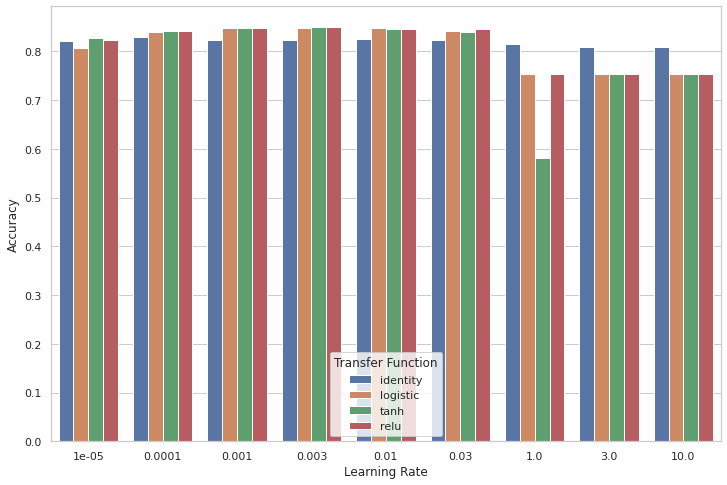

In [ ]:
sns.barplot(x='Learning Rate', y='Accuracy', hue='Transfer Function', data=result)

# xG Boost

In [ ]:
rfc = RandomForestClassifier(max_depth=10, n_estimators=100, criterion='gini')
# Hyperparameter tuning of XGBoost
param_grid = {'max_depth':[2, 4, 5, 7, 9, 10], 'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3, 0.35], 'min_child_weight':[2, 4, 5, 6, 7]}
grid = GridSearchCV(XGBClassifier(), param_grid=param_grid, verbose=3)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

Best paramter after running the pipleline, we get max_depth = 5, learning_rate = 0.2 and min_child_weight = 7

In [ ]:
param_grid = {'max_depth':[5], 'learning_rate':[0.3], 'min_child_weight':[7]}
grid = GridSearchCV(XGBClassifier(), param_grid=param_grid, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] learning_rate=0.3, max_depth=5, min_child_weight=7 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.3, max_depth=5, min_child_weight=7, score=0.847, total=   1.3s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=7 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  learning_rate=0.3, max_depth=5, min_child_weight=7, score=0.856, total=   1.3s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=7 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV]  learning_rate=0.3, max_depth=5, min_child_weight=7, score=0.845, total=   1.3s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=7 ..............
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=7, score=0.850, total=   1.3s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=7 ..............
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=7, score=0.851, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.3], 'max_depth': [5],
                         'min_child_weight': [7]},
             pre_dispatch='2*n_jobs', refit=True, return

In [ ]:
grid.best_score_

0.8497271253334798

In [ ]:
xgb = XGBClassifier(learning_rate=0.3, max_depth=5, min_child_weight=7)

## CatBoost

In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2 MB 4.8 kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
param_grid = {'depth':[2, 4, 5, 7, 9, 10], 'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3], 'iterations':[30, 50, 100]}
grid = GridSearchCV(CatBoostClassifier(), param_grid, verbose=3)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

Best parameters for using catBoost by gridsearch are:
depth = 10, learning_rate =  0.3, and iterations = 100

In [ ]:
param_grid = {'depth':[10], 'learning_rate':[0.3], 'iterations':[100]}
grid = GridSearchCV(CatBoostClassifier(), param_grid, verbose=3)
grid.fit(X_train, y_train)

In [ ]:
grid.best_score_

0.8478796470088863

In [ ]:
cb = CatBoostClassifier(iterations=100, depth=10, learning_rate=0.3, verbose=False)

In [ ]:
classifiers = [xgb, cb]
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=11)
scores_dict = {}

for train_index, valid_index in folds.split(X_train, y_train):
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]
    for classifier in classifiers:
        name = classifier.__class__.__name__
        classifier.fit(X_train_fold, y_train_fold)
        training_predictions = classifier.predict_proba(X_valid_fold)
        scores = roc_auc_score(y_valid_fold, training_predictions[:, 1])
        if name in scores_dict:
            scores_dict[name] += scores
        else:
            scores_dict[name] = scores
for classifier in scores_dict:
    scores_dict[classifier] = scores_dict[classifier]/folds.n_splits

In [ ]:
scores_dict

{'CatBoostClassifier': 0.8991279046052335, 'XGBClassifier': 0.9027116257863773}

In [ ]:
final_predictions = xgb.predict_proba(X_test)
print(roc_auc_score(y_test, final_predictions[:, 1]))

0.9056098721521776


In [ ]:
classifiers = [LogisticRegression(), 
               KNeighborsClassifier(21, 'uniform', metric='manhattan'), 
               MultinomialNB(), 
               DecisionTreeClassifier('gini', 'best', 5),
               MLPClassifier(max_iter=1000, learning_rate_init= 0.003, activation='relu'),
               XGBClassifier(learning_rate=0.3, max_depth=5, min_child_weight=7),
               CatBoostClassifier(iterations=100, depth=10, learning_rate=0.3, verbose=False)]
classifier_names = ["Logistic", 
                    "kNN Classifier",
                    "Naive Bayes Classifier", 
                    "Decision Tree Classifier", 
                    "Neural Network", 
                    "xGBoost",
                    "CatBoost"]
accuracies = []


### F1 Score

In [ ]:
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic:
F1 score: 0.56
kNN Classifier:
F1 score: 0.62
Naive Bayes Classifier:
F1 score: 0.56
Decision Tree Classifier:
F1 score: 0.62
Neural Network:
F1 score: 0.64
xGBoost:
F1 score: 0.67
CatBoost:
F1 score: 0.67


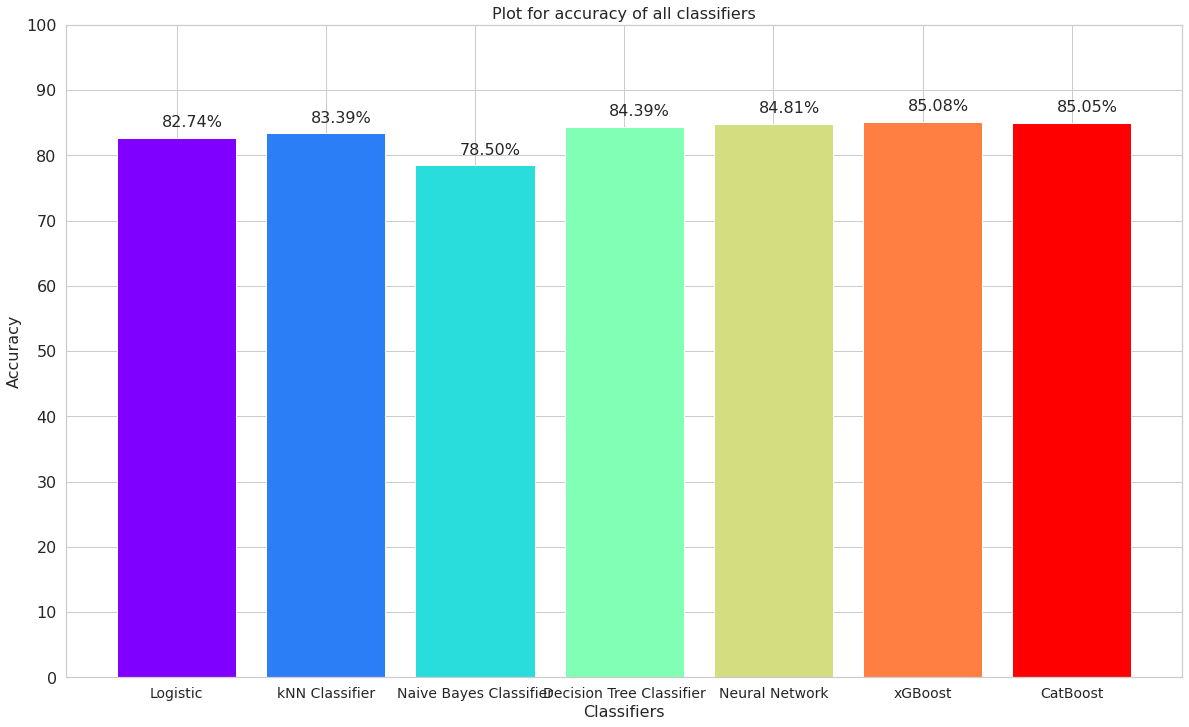

In [ ]:
plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

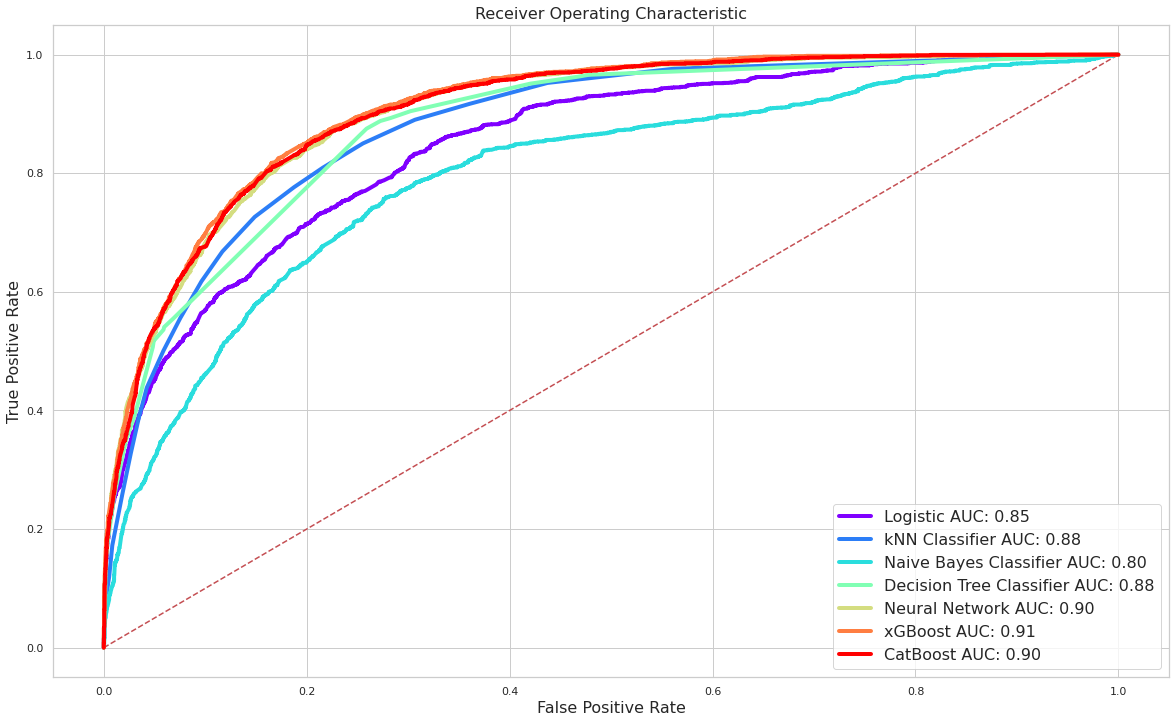

In [ ]:
from sklearn.metrics import roc_curve, auc
from matplotlib.cm import rainbow
colors = rainbow(np.linspace(0, 1, len(classifiers)))
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

for i in range(len(classifiers)):
    classifier = classifiers[i]
    probs = classifier.predict_proba(X_test)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = classifier_names[i] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = colors[i], label = label, linewidth = 4)
    
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

# Forward and Backward Selection of Variables

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
mlpClas = MLPClassifier(learning_rate_init= 0.03, activation='relu')
# Build step forward feature selection
sfs1 = sfs(mlpClas,
           k_features=8,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  2.4min finished

[2021-08-02 02:26:03] Features: 1/8 -- score: 0.8008974361827406[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.1min finished

[2021-08-02 02:28:11] Features: 2/8 -- score: 0.8065723971491575[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.1min finished

[2021-08-02 02:30:15] Features: 3/8 -- score: 0.8357820180118083[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [ ]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 2, 3, 4, 5, 7, 8, 10]


In [ ]:
# Build full model with selected features
mlpClas = MLPClassifier(learning_rate_init= 0.03, activation='relu')
mlpClas.fit(X_train.iloc[:, feat_cols], y_train)

y_train_pred = mlpClas.predict(X_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))

y_test_pred = mlpClas.predict(X_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

Training accuracy on selected features: 0.843
Testing accuracy on selected features: 0.846


In [ ]:
# Build full model on ALL features, for comparison
mlpClas = MLPClassifier(learning_rate_init= 0.03, activation='relu')
mlpClas.fit(X_train, y_train)

y_train_pred = mlpClas.predict(X_train)
print('Training accuracy on all features: %.3f' % accuracy_score(y_train, y_train_pred))

y_test_pred = mlpClas.predict(X_test)
print('Testing accuracy on all features: %.3f' % accuracy_score(y_test, y_test_pred))

Training accuracy on all features: 0.843
Testing accuracy on all features: 0.844


In [ ]:
results=pd.DataFrame(columns=['Column Index', 'Accuracy Score'])
k=0

x=MLPClassifier(learning_rate_init= 0.03, activation='relu')

for i in range(1, 11):
    x_train=X_train.iloc[:,i:]
    x_test=X_test.iloc[:,i:]
    x.fit(x_train, y_train)
    pred = x.predict(x_test)
    results.loc[k] = [i-1, accuracy_score(y_test, pred)]
    k+=1

print(tabulate(results, headers=results.columns, tablefmt='grid'))

+----+----------------+------------------+
|    |   Column Index |   Accuracy Score |
+====+================+==================+
|  0 |              0 |         0.844381 |
+----+----------------+------------------+
|  1 |              1 |         0.841016 |
+----+----------------+------------------+
|  2 |              2 |         0.806139 |
+----+----------------+------------------+
|  3 |              3 |         0.808994 |
+----+----------------+------------------+
|  4 |              4 |         0.805833 |
+----+----------------+------------------+
|  5 |              5 |         0.799001 |
+----+----------------+------------------+
|  6 |              6 |         0.799001 |
+----+----------------+------------------+
|  7 |              7 |         0.799001 |
+----+----------------+------------------+
|  8 |              8 |         0.799001 |
+----+----------------+------------------+
|  9 |              9 |         0.799001 |
+----+----------------+------------------+


In [ ]:
results=pd.DataFrame(columns=['Columns Index:', 'Accuracy Score'])
k=0

x=MLPClassifier(learning_rate_init= 0.03, activation='relu')

for i in range(10, 0, -1):
    x_train=X_train.iloc[:,:i]
    x_test=X_test.iloc[:, :i]
    x.fit(x_train, y_train)
    pred = x.predict(x_test)
    results.loc[k] = [i-1, accuracy_score(y_test, pred)]
    k+=1

print(tabulate(results, headers=results.columns, tablefmt='grid'))

+----+------------------+------------------+
|    |   Columns Index: |   Accuracy Score |
+====+==================+==================+
|  0 |                9 |         0.830614 |
+----+------------------+------------------+
|  1 |                8 |         0.822354 |
+----+------------------+------------------+
|  2 |                7 |         0.821742 |
+----+------------------+------------------+
|  3 |                6 |         0.823781 |
+----+------------------+------------------+
|  4 |                5 |         0.82113  |
+----+------------------+------------------+
|  5 |                4 |         0.821232 |
+----+------------------+------------------+
|  6 |                3 |         0.821232 |
+----+------------------+------------------+
|  7 |                2 |         0.771059 |
+----+------------------+------------------+
|  8 |                1 |         0.754028 |
+----+------------------+------------------+
|  9 |                0 |         0.754028 |
+----+----